In [ ]:
cd /content/drive/My Drive/Dava with ML

/content/drive/My Drive/Dava with ML


In [ ]:
!unzip breast-cancer-wisconsin-data.zip

Archive:  breast-cancer-wisconsin-data.zip
  inflating: data.csv                


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as m


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
ls

 breast-cancer-wisconsin-data.zip   hepatitisdata.csv
 Cancer.ipynb                       indian_liver_patient.csv
 cardiovaskular_dataset.zip         indian-liver-patient-records.zip
 chronic-kidney-disease.zip         kidney.ipynb
'covid pnemonia.ipynb'              liver.ipynb
 data.csv                           model_cancer5.h5
 Dataset_spine.csv                  model_cancer5.pb/
 dataset.zip                        model_cancer8.h5
 degree_cancer_5.tflite             model_cancer.pkl
 degree_cancer_8.tflite             model_covid.h5
 degree_covid_mobilenet.tflite      model_diabeties.h5
 degree_covid.tflite                model_heart.h5
 degree_covid_vgg.tflite            model_kidney.h5
 degree_diabeties.tflite            model_liver.h5
 degree_heart.tflite                model_spine.h5
 degree_kidney.tflite               new_model.csv
 degree_liver.tflite                parkinson_dataset.zip
 degreeliver.tflite                 Parkinson.ipynb
 degree_spine.tflite               

In [ ]:
dataset=pd.read_csv('data.csv')
dataset

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0      842302         M  ...                  0.11890          NaN
1      842517         M  ...                  0.08902          NaN
2    84300903         M  ...                  0.08758          NaN
3    84348301         M  ...                  0.17300          NaN
4    84358402         M  ...                  0.07678          NaN
..        ...       ...  ...                      ...          ...
564    926424         M  ...                  0.07115          NaN
565    926682         M  ...                  0.06637          NaN
566    926954         M  ...                  0.07820          NaN
567    927241         M  ...                  0.12400          NaN
568     92751         B  ...                  0.07039          NaN

[569 rows x 33 columns]

In [ ]:
dataset.drop(['id'],axis=1)

diagnosis  radius_mean  ...  fractal_dimension_worst  Unnamed: 32
0           M        17.99  ...                  0.11890          NaN
1           M        20.57  ...                  0.08902          NaN
2           M        19.69  ...                  0.08758          NaN
3           M        11.42  ...                  0.17300          NaN
4           M        20.29  ...                  0.07678          NaN
..        ...          ...  ...                      ...          ...
564         M        21.56  ...                  0.07115          NaN
565         M        20.13  ...                  0.06637          NaN
566         M        16.60  ...                  0.07820          NaN
567         M        20.60  ...                  0.12400          NaN
568         B         7.76  ...                  0.07039          NaN

[569 rows x 32 columns]

In [ ]:
dataset=dataset.iloc[:,:-1]

In [ ]:
dataset

id diagnosis  ...  symmetry_worst  fractal_dimension_worst
0      842302         M  ...          0.4601                  0.11890
1      842517         M  ...          0.2750                  0.08902
2    84300903         M  ...          0.3613                  0.08758
3    84348301         M  ...          0.6638                  0.17300
4    84358402         M  ...          0.2364                  0.07678
..        ...       ...  ...             ...                      ...
564    926424         M  ...          0.2060                  0.07115
565    926682         M  ...          0.2572                  0.06637
566    926954         M  ...          0.2218                  0.07820
567    927241         M  ...          0.4087                  0.12400
568     92751         B  ...          0.2871                  0.07039

[569 rows x 32 columns]

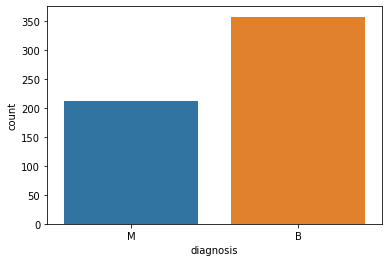

In [ ]:
sns.countplot(x='diagnosis',data=dataset)

In [ ]:
dataset

id diagnosis  ...  symmetry_worst  fractal_dimension_worst
0      842302         M  ...          0.4601                  0.11890
1      842517         M  ...          0.2750                  0.08902
2    84300903         M  ...          0.3613                  0.08758
3    84348301         M  ...          0.6638                  0.17300
4    84358402         M  ...          0.2364                  0.07678
..        ...       ...  ...             ...                      ...
564    926424         M  ...          0.2060                  0.07115
565    926682         M  ...          0.2572                  0.06637
566    926954         M  ...          0.2218                  0.07820
567    927241         M  ...          0.4087                  0.12400
568     92751         B  ...          0.2871                  0.07039

[569 rows x 32 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['diagnosis']=le.fit_transform(dataset['diagnosis'])

In [ ]:
dataset['diagnosis'].unique()

array([1, 0])

In [ ]:
dataset=dataset.drop('id',axis=1)

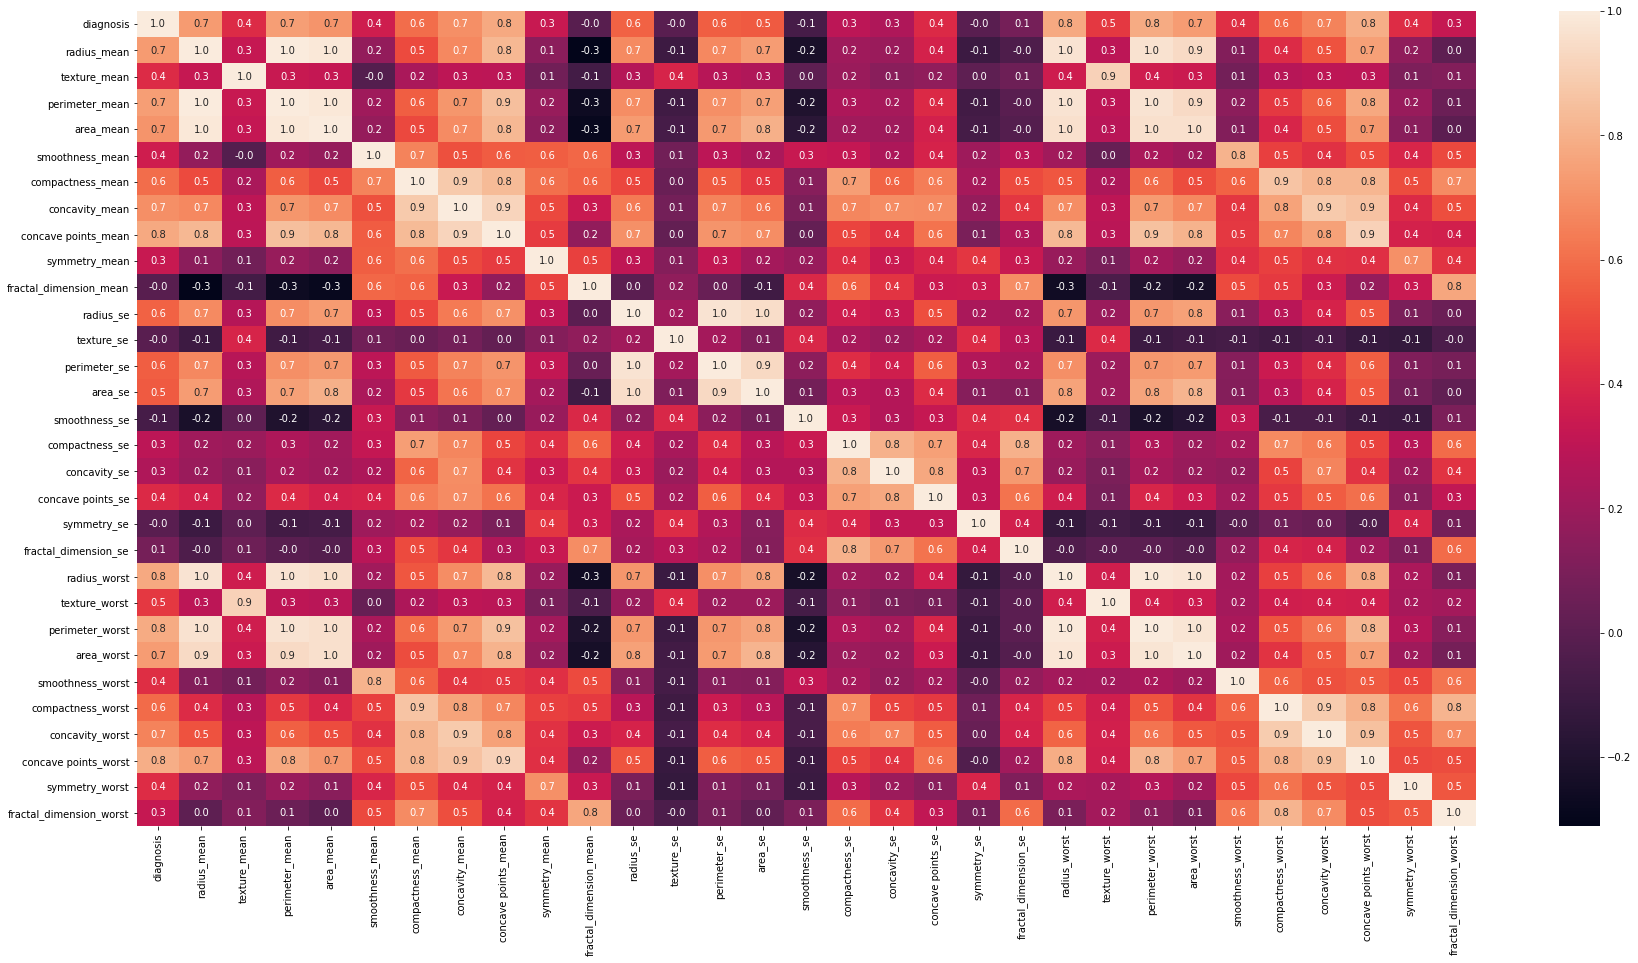

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(),annot=True,fmt='.1f')
plt.show()

In [ ]:
dataset.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
dataset=dataset.drop('perimeter_mean',axis=1).drop('area_mean',axis=1).drop('compactness_mean',axis=1).drop('concave points_mean',axis=1).drop('perimeter_se',axis=1).drop('area_se',axis=1).drop('compactness_se',axis=1).drop('concave points_se',axis=1)

In [ ]:
dataset=dataset.drop('perimeter_worst',axis=1).drop('area_worst',axis=1).drop('compactness_worst',axis=1).drop('concave points_worst',axis=1)

In [ ]:
dataset

diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0            1        17.99  ...          0.4601                  0.11890
1            1        20.57  ...          0.2750                  0.08902
2            1        19.69  ...          0.3613                  0.08758
3            1        11.42  ...          0.6638                  0.17300
4            1        20.29  ...          0.2364                  0.07678
..         ...          ...  ...             ...                      ...
564          1        21.56  ...          0.2060                  0.07115
565          1        20.13  ...          0.2572                  0.06637
566          1        16.60  ...          0.2218                  0.07820
567          1        20.60  ...          0.4087                  0.12400
568          0         7.76  ...          0.2871                  0.07039

[569 rows x 19 columns]

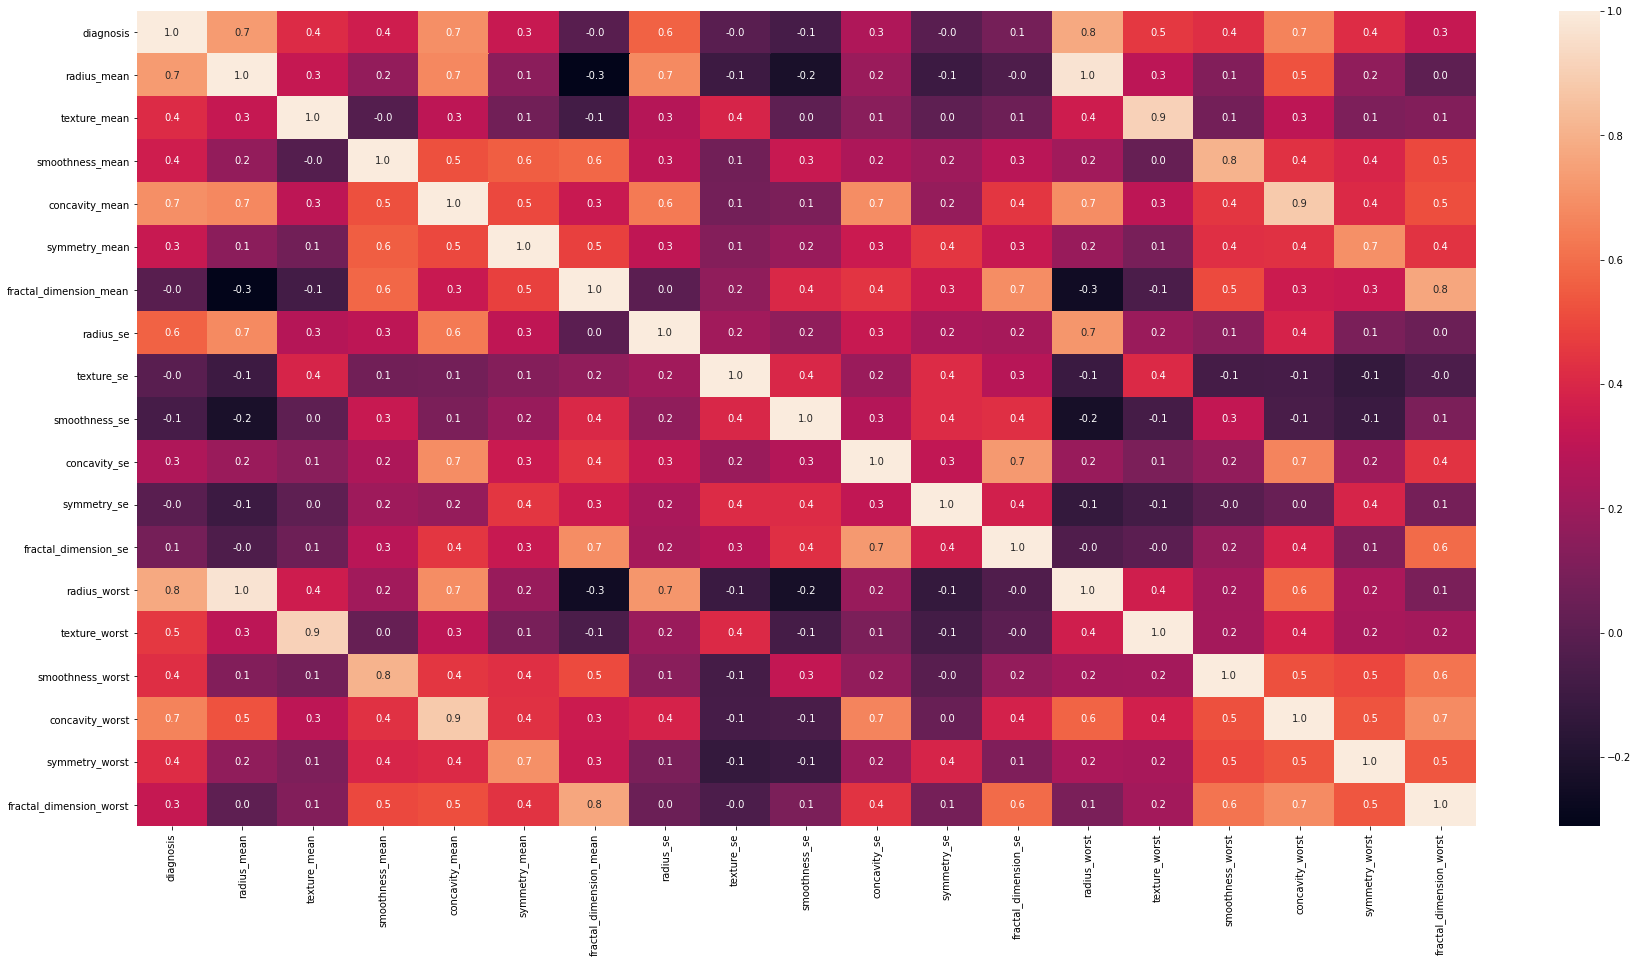

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(),annot=True,fmt='.1f')
plt.show()

In [ ]:
dataset=dataset.drop('texture_worst',axis=1)

In [ ]:
dataset=dataset.drop('texture_mean',axis=1)

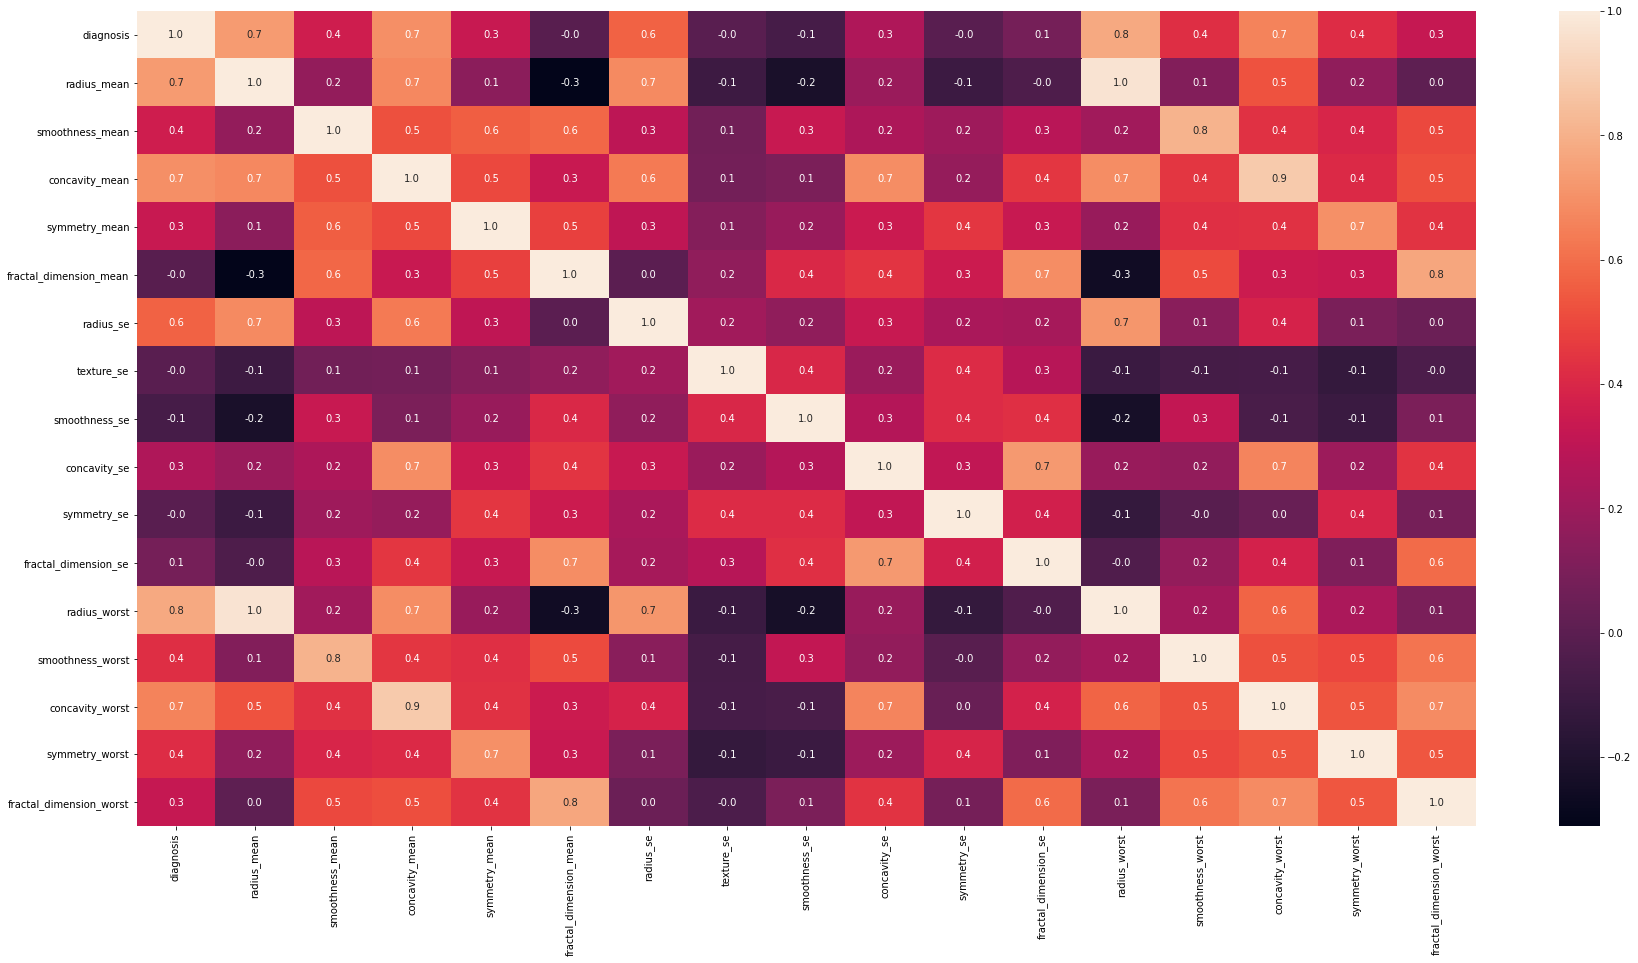

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(),annot=True,fmt='.1f')
plt.show()

In [ ]:
dataset=dataset.drop('concavity_worst',axis=1)

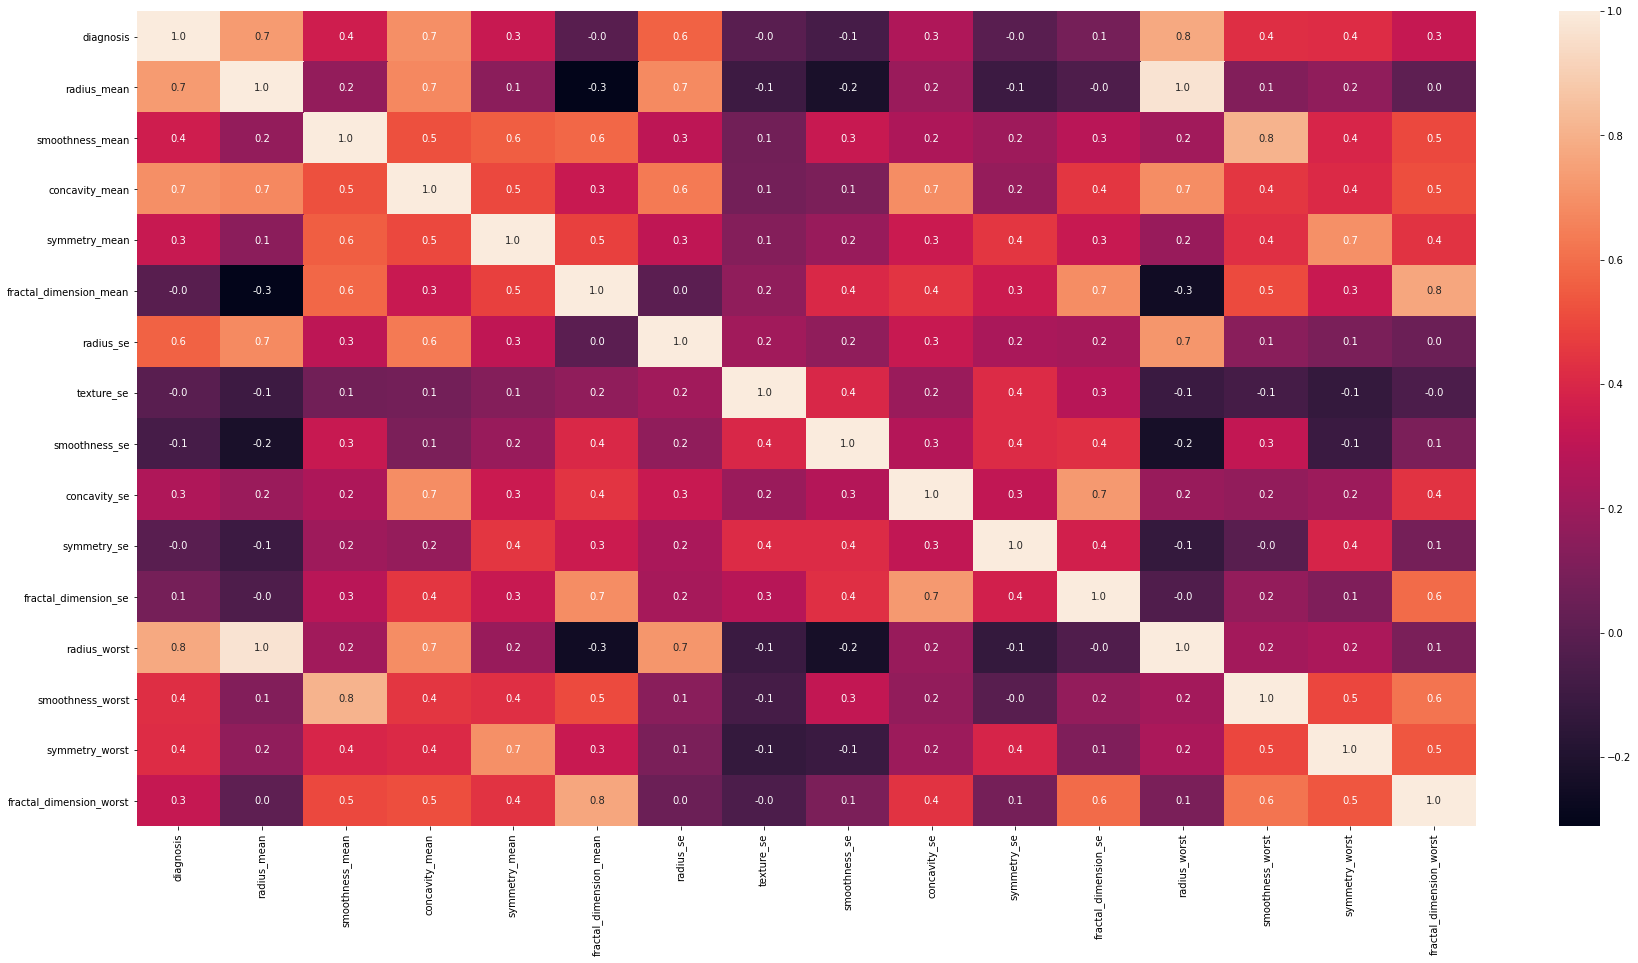

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(),annot=True,fmt='.1f')
plt.show()

In [ ]:
dataset

diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0            1        17.99  ...          0.4601                  0.11890
1            1        20.57  ...          0.2750                  0.08902
2            1        19.69  ...          0.3613                  0.08758
3            1        11.42  ...          0.6638                  0.17300
4            1        20.29  ...          0.2364                  0.07678
..         ...          ...  ...             ...                      ...
564          1        21.56  ...          0.2060                  0.07115
565          1        20.13  ...          0.2572                  0.06637
566          1        16.60  ...          0.2218                  0.07820
567          1        20.60  ...          0.4087                  0.12400
568          0         7.76  ...          0.2871                  0.07039

[569 rows x 16 columns]

In [ ]:
dir(le)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 'classes_',
 'fit',
 'fit_transform',
 'get_params',
 'inverse_transform',
 'set_params',
 'transform']

In [ ]:
le.classes_

array(['B', 'M'], dtype=object)

In [ ]:
features=dataset.iloc[:,1:6]

In [ ]:
features

radius_mean  smoothness_mean  ...  symmetry_mean  fractal_dimension_mean
0          17.99          0.11840  ...         0.2419                 0.07871
1          20.57          0.08474  ...         0.1812                 0.05667
2          19.69          0.10960  ...         0.2069                 0.05999
3          11.42          0.14250  ...         0.2597                 0.09744
4          20.29          0.10030  ...         0.1809                 0.05883
..           ...              ...  ...            ...                     ...
564        21.56          0.11100  ...         0.1726                 0.05623
565        20.13          0.09780  ...         0.1752                 0.05533
566        16.60          0.08455  ...         0.1590                 0.05648
567        20.60          0.11780  ...         0.2397                 0.07016
568         7.76          0.05263  ...         0.1587                 0.05884

[569 rows x 5 columns]

In [ ]:
labels=dataset.iloc[:,0]

In [ ]:
labels

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
feature_train,feature_test,label_train,label_test=train_test_split(features,labels,test_size=0.2,random_state=42)

##Logistic Regression

In [ ]:
model=LogisticRegression()
model.fit(feature_train,label_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
label_pred=model.predict(feature_test)

In [ ]:
m.accuracy_score(label_test,label_pred)

0.9298245614035088

In [ ]:
label_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [ ]:
label_test

204    0
70     1
131    1
431    0
540    0
      ..
486    0
75     1
249    0
238    0
265    1
Name: diagnosis, Length: 114, dtype: int64

In [ ]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        71
           1       0.97      0.84      0.90        43

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



In [ ]:
print(m.confusion_matrix(label_test,label_pred))

[[70  1]
 [ 7 36]]


##KNN

In [ ]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
param={'n_neighbors':list(np.arange(1,20))}


In [ ]:
model=GridSearchCV(knn,param_grid=param)
model.fit(feature_train,label_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
model.best_params_

{'n_neighbors': 5}

In [ ]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(feature_train,label_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
label_pred=model.predict(feature_test)

In [ ]:
m.accuracy_score(label_test,label_pred)

0.9385964912280702

In [ ]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.95      0.88      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
print(m.confusion_matrix(label_test,label_pred))

[[69  2]
 [ 5 38]]


In [ ]:
label_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

In [ ]:
label_test

204    0
70     1
131    1
431    0
540    0
      ..
486    0
75     1
249    0
238    0
265    1
Name: diagnosis, Length: 114, dtype: int64

##Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier()
param={'max_depth':list(np.arange(1,20))}


In [ ]:
model=GridSearchCV(dt,param_grid=param)
model.fit(feature_train,label_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1

In [ ]:
model.best_params_

{'max_depth': 5}

In [ ]:
model=DecisionTreeClassifier(max_depth=5)
model.fit(feature_train,label_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
label_pred=model.predict(feature_test)

In [ ]:
m.accuracy_score(label_test,label_pred)

0.9298245614035088

In [ ]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [ ]:
print(m.confusion_matrix(label_test,label_pred))

[[67  4]
 [ 4 39]]


In [ ]:
label_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

In [ ]:
label_test

204    0
70     1
131    1
431    0
540    0
      ..
486    0
75     1
249    0
238    0
265    1
Name: diagnosis, Length: 114, dtype: int64

##SVM

In [ ]:
model=SVC(kernel='linear')
model.fit(feature_train,label_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
label_pred=model.predict(feature_test)

In [ ]:
m.accuracy_score(label_test,label_pred)

0.9385964912280702

In [ ]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        71
           1       1.00      0.84      0.91        43

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
print(m.confusion_matrix(label_test,label_pred))

[[71  0]
 [ 7 36]]


In [ ]:
label_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [ ]:
label_test

204    0
70     1
131    1
431    0
540    0
      ..
486    0
75     1
249    0
238    0
265    1
Name: diagnosis, Length: 114, dtype: int64

##RandomForest Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
param={'n_estimators':[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200],'max_depth':list(np.arange(1,20))}


In [ ]:
model=GridSearchCV(rfc,param_grid=param)
model.fit(feature_train,label_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
model.best_params_

{'max_depth': 3, 'n_estimators': 80}

In [ ]:
model=model.best_estimator_

In [ ]:
label_pred=model.predict(feature_test)

In [ ]:
m.accuracy_score(label_test,label_pred)

0.9473684210526315

In [ ]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
print(m.confusion_matrix(label_test,label_pred))

[[69  2]
 [ 4 39]]


In [ ]:
label_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [ ]:
label_test

204    0
70     1
131    1
431    0
540    0
      ..
486    0
75     1
249    0
238    0
265    1
Name: diagnosis, Length: 114, dtype: int64

#Neural Network

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
from keras.utils.np_utils import to_categorical
label_train=to_categorical(label_train)
label_test=to_categorical(label_test)

In [ ]:
model=Sequential()
model.add(Dense(100,input_shape=[5],activation='relu'))
model.add(Dense(2,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               600       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 802
Trainable params: 802
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(feature_train,label_train,epochs=700)

Epoch 1/700
15/15 [==============================] - 0s 1ms/step - loss: 0.7128 - accuracy: 0.5275
Epoch 2/700
15/15 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.6286
Epoch 3/700
15/15 [==============================] - 0s 1ms/step - loss: 0.6746 - accuracy: 0.6659
Epoch 4/700
15/15 [==============================] - 0s 1ms/step - loss: 0.6671 - accuracy: 0.6527
Epoch 5/700
15/15 [==============================] - 0s 1ms/step - loss: 0.6601 - accuracy: 0.6352
Epoch 6/700
15/15 [==============================] - 0s 1ms/step - loss: 0.6545 - accuracy: 0.7626
Epoch 7/700
15/15 [==============================] - 0s 1ms/step - loss: 0.6512 - accuracy: 0.8396
Epoch 8/700
15/15 [==============================] - 0s 1ms/step - loss: 0.6471 - accuracy: 0.6286
Epoch 9/700
15/15 [==============================] - 0s 1ms/step - loss: 0.6405 - accuracy: 0.7890
Epoch 10/700
15/15 [==============================] - 0s 1ms/step - loss: 0.6316 - accuracy: 0.6571
Epoch 11/

In [ ]:
label_pred=model.predict(feature_test)

In [ ]:
label_pred

array([[8.78920436e-01, 1.21273696e-01],
       [2.08383501e-02, 9.79056954e-01],
       [9.62907970e-02, 9.03398514e-01],
       [8.97881746e-01, 1.02086455e-01],
       [9.58246231e-01, 4.17839587e-02],
       [9.68900895e-06, 9.99990284e-01],
       [5.21281254e-05, 9.99947309e-01],
       [7.11755753e-02, 9.28676248e-01],
       [5.86311758e-01, 4.13538903e-01],
       [9.22917962e-01, 7.75788426e-02],
       [9.42462564e-01, 5.75434864e-02],
       [1.67568237e-01, 8.32752347e-01],
       [8.32589626e-01, 1.67281091e-01],
       [2.48966515e-02, 9.74932551e-01],
       [9.68860507e-01, 3.11739743e-02],
       [2.03040242e-03, 9.97945011e-01],
       [7.90252566e-01, 2.09902883e-01],
       [9.96778905e-01, 3.23191285e-03],
       [9.98492718e-01, 1.38860941e-03],
       [3.82721424e-04, 9.99616504e-01],
       [7.43073165e-01, 2.56373137e-01],
       [9.53087151e-01, 4.70616817e-02],
       [2.50841586e-05, 9.99974728e-01],
       [9.97891665e-01, 2.11498141e-03],
       [9.872109

In [ ]:
label_pred=np.argmax(label_pred,axis=1)

In [ ]:
label_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [ ]:
label_test=np.argmax(label_test,axis=1)
label_train=np.argmax(label_train,axis=1)

In [ ]:
m.accuracy_score(label_test,label_pred)

0.9649122807017544

In [ ]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
print(m.confusion_matrix(label_test,label_pred))

[[71  0]
 [ 4 39]]


In [ ]:
label_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [ ]:
label_test

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [ ]:
import tensorflow


In [ ]:
%tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


In [ ]:
model.save('model_cancer5.h5')

In [ ]:
import pickle


In [ ]:
pickle.dump(model,open('model_cancer.pkl','wb+'))

TypeError: ignored

In [ ]:
# We need to create a TFLite Converter Object from model we created

converter = tensorflow.lite.TFLiteConverter.from_keras_model(model=model)

In [ ]:
# Create a tflite model object from TFLite Converter

tfmodel = converter.convert()

# Save TFLite model into a .tflite file 

open("degree_cancer_5.tflite","wb").write(tfmodel)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmpmypsemcu/assets


4500

In [ ]:
m=tensorflow.keras.models.load_model('model_cancer5.h5')

In [ ]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               600       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 802
Trainable params: 802
Non-trainable params: 0
_________________________________________________________________


#Neural Network with 8 parameters

In [ ]:
dataset

diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0            1        17.99  ...          0.4601                  0.11890
1            1        20.57  ...          0.2750                  0.08902
2            1        19.69  ...          0.3613                  0.08758
3            1        11.42  ...          0.6638                  0.17300
4            1        20.29  ...          0.2364                  0.07678
..         ...          ...  ...             ...                      ...
564          1        21.56  ...          0.2060                  0.07115
565          1        20.13  ...          0.2572                  0.06637
566          1        16.60  ...          0.2218                  0.07820
567          1        20.60  ...          0.4087                  0.12400
568          0         7.76  ...          0.2871                  0.07039

[569 rows x 16 columns]

In [ ]:
features=dataset.iloc[:,1:9]

In [ ]:
features

radius_mean  smoothness_mean  ...  texture_se  smoothness_se
0          17.99          0.11840  ...      0.9053       0.006399
1          20.57          0.08474  ...      0.7339       0.005225
2          19.69          0.10960  ...      0.7869       0.006150
3          11.42          0.14250  ...      1.1560       0.009110
4          20.29          0.10030  ...      0.7813       0.011490
..           ...              ...  ...         ...            ...
564        21.56          0.11100  ...      1.2560       0.010300
565        20.13          0.09780  ...      2.4630       0.005769
566        16.60          0.08455  ...      1.0750       0.005903
567        20.60          0.11780  ...      1.5950       0.006522
568         7.76          0.05263  ...      1.4280       0.007189

[569 rows x 8 columns]

In [ ]:
labels=dataset.iloc[:,0]

In [ ]:
labels

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
feature_train,feature_test,label_train,label_test=train_test_split(features,labels,test_size=0.2,random_state=42)

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
from keras.utils.np_utils import to_categorical
label_train=to_categorical(label_train)
label_test=to_categorical(label_test)

In [ ]:
model=Sequential()
model.add(Dense(100,input_shape=[8],activation='relu'))
model.add(Dense(2,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               900       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 202       
Total params: 1,102
Trainable params: 1,102
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(feature_train,label_train,epochs=700)

Epoch 1/700
15/15 [==============================] - 0s 2ms/step - loss: 0.8841 - accuracy: 0.6286
Epoch 2/700
15/15 [==============================] - 0s 2ms/step - loss: 0.7091 - accuracy: 0.4462
Epoch 3/700
15/15 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.6484
Epoch 4/700
15/15 [==============================] - 0s 2ms/step - loss: 0.6642 - accuracy: 0.6418
Epoch 5/700
15/15 [==============================] - 0s 2ms/step - loss: 0.6498 - accuracy: 0.6747
Epoch 6/700
15/15 [==============================] - 0s 2ms/step - loss: 0.6390 - accuracy: 0.7626
Epoch 7/700
15/15 [==============================] - 0s 2ms/step - loss: 0.6242 - accuracy: 0.7099
Epoch 8/700
15/15 [==============================] - 0s 2ms/step - loss: 0.6122 - accuracy: 0.8066
Epoch 9/700
15/15 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.7121
Epoch 10/700
15/15 [==============================] - 0s 2ms/step - loss: 0.5867 - accuracy: 0.8066
Epoch 11/

In [ ]:
label_pred=model.predict(feature_test)

In [ ]:
label_pred

array([[8.03817868e-01, 1.92713082e-01],
       [3.91615136e-03, 9.95874226e-01],
       [3.58839519e-02, 9.63348985e-01],
       [9.32768464e-01, 6.83875382e-02],
       [9.55959201e-01, 4.50849906e-02],
       [4.02588630e-05, 9.99958038e-01],
       [1.13515853e-05, 9.99989152e-01],
       [3.26576531e-02, 9.66132224e-01],
       [5.25546014e-01, 4.73662853e-01],
       [9.83087361e-01, 1.65734496e-02],
       [9.75471258e-01, 2.46093441e-02],
       [6.33563995e-02, 9.36579585e-01],
       [9.56994414e-01, 4.32334319e-02],
       [1.47425150e-02, 9.85110879e-01],
       [9.93190706e-01, 6.63693948e-03],
       [1.99040119e-02, 9.79649484e-01],
       [9.40522015e-01, 5.84266074e-02],
       [9.98020649e-01, 2.07137549e-03],
       [9.99687195e-01, 3.10694042e-04],
       [7.51896732e-05, 9.99925017e-01],
       [8.17484796e-01, 1.78548351e-01],
       [9.55584943e-01, 4.54572402e-02],
       [1.71011798e-05, 9.99984026e-01],
       [9.98937786e-01, 1.04414474e-03],
       [9.896401

In [ ]:
label_pred=np.argmax(label_pred,axis=1)

In [ ]:
label_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [ ]:
label_test=np.argmax(label_test,axis=1)
label_train=np.argmax(label_train,axis=1)

In [ ]:
m.accuracy_score(label_test,label_pred)

0.9736842105263158

In [ ]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
print(m.confusion_matrix(label_test,label_pred))

[[71  0]
 [ 3 40]]


In [ ]:
label_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [ ]:
label_test

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [ ]:
import tensorflow



In [ ]:
model.save('model_cancer8.h5')

In [ ]:
# We need to create a TFLite Converter Object from model we created

converter = tensorflow.lite.TFLiteConverter.from_keras_model(model=model)

In [ ]:
# Create a tflite model object from TFLite Converter

tfmodel = converter.convert()

# Save TFLite model into a .tflite file 

open("degree_cancer_8.tflite","wb").write(tfmodel)

INFO:tensorflow:Assets written to: /tmp/tmpryq2e01q/assets


INFO:tensorflow:Assets written to: /tmp/tmpryq2e01q/assets


5740